# WeRateDogs Wrangling Project#

+ [Gather Data](#gather)
+ [Assessment](#a)
    + [df_archive](#a_archive)
    + [df_breed](#a_breed)
    + [df_response](#a_response)
    + [Assessment Summary](#a_summary)
+ [Clean](#c)
    + [df_archive](#c_archive)
    + [df_breed](#c_breed)
    + [df_response](#c_response)
+ [Storing Data](#storing)
+ [Analysis/Visualization](#analysis)

In [387]:
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json
import re
import matplotlib.pyplot as plt
%matplotlib inline

<a id='gather'></a>
## Gather Data##

**1. Download data manually**

In [2]:
df_archive=pd.read_csv('raw_data/twitter-archive-enhanced.csv')

**2. Download data programmatically using the Requests library and the given URL**

In [3]:
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r=requests.get(url)

In [4]:
filename='raw_data/image_predictions.tsv'
with open(filename,'w') as file:
    file.write(r.text)  

In [5]:
df_breed=pd.read_csv(filename,sep='\t')

**3. Import data using Twitter's API**

In [6]:
consumer_key = 'TChmmCyZOwbunKNqNrk2XXlzx'
consumer_secret = 'kbmIFUPwkr6axCDDaWJC7fKAuoah2D4FFwV5OeITEnVrCz8Vgj'
access_token = '1069284033715068928-3YBBKqDXdLUbzZlh43Eq9D8VkggCoF'
access_secret = 'yJEbB3nB3mckQTC4qQyz3bEssjXeOrudo2Ri3YZYFLhn1'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [7]:
error_id=[]
data_list=[]
tweet_ids=df_archive['tweet_id']

with open('raw_data/tweet_json.txt','a', encoding='utf8') as file:
    for tweet_id in tweet_ids:
        try:
            tweet=api.get_status(tweet_id,tweet_mode='extended')._json
            data_list.append(tweet)
            json.dump(tweet,file)
            file.write('\n')
        except:
            error_id.append(tweet_id)
            print('Error for tweet_id#: {}'.format(tweet_id))
            continue

Error for tweet_id#: 888202515573088257
Error for tweet_id#: 873697596434513921
Error for tweet_id#: 872668790621863937
Error for tweet_id#: 869988702071779329
Error for tweet_id#: 866816280283807744
Error for tweet_id#: 861769973181624320
Error for tweet_id#: 845459076796616705
Error for tweet_id#: 842892208864923648
Error for tweet_id#: 837012587749474308
Error for tweet_id#: 827228250799742977


Rate limit reached. Sleeping for: 709


Error for tweet_id#: 802247111496568832
Error for tweet_id#: 775096608509886464
Error for tweet_id#: 770743923962707968
Error for tweet_id#: 754011816964026368


Rate limit reached. Sleeping for: 724
Rate limit reached. Sleeping for: 724


In [9]:
df_response=pd.DataFrame(data_list)

<a id='a'></a>
## Assess Data##

<a id='a_archive'></a>
**df_archive**

In [10]:
df_archive.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


+ contains retweeted entries
+ missing data for name and dog stage

In [11]:
df_archive.name.value_counts()

None         745
a             55
Charlie       12
Cooper        11
Lucy          11
Oliver        11
Lola          10
Tucker        10
Penny         10
Bo             9
Winston        9
Sadie          8
the            8
Daisy          7
Toby           7
Buddy          7
an             7
Bailey         7
Jack           6
Koda           6
Oscar          6
Rusty          6
Jax            6
Bella          6
Milo           6
Stanley        6
Scout          6
Dave           6
Leo            6
Bentley        5
            ... 
Callie         1
Scruffers      1
Bobb           1
Cal            1
Norman         1
Finnegus       1
Arlen          1
Florence       1
Mo             1
Jockson        1
Fiji           1
Maisey         1
Shikha         1
Nico           1
Chef           1
Danny          1
Anna           1
Cedrick        1
Siba           1
Willem         1
Gilbert        1
Remy           1
Monster        1
Tripp          1
Tilly          1
Suki           1
Jangle         1
Deacon        

+ Some values under name are not actual names. ('None', 'the', 'a', 'an', incredibly')

In [12]:
df_archive.query('name=="a"')[['text','name']].head(10)

,text,name
56,Here is a pupper approaching maximum borkdrive...,a
649,Here is a perfect example of someone who has t...,a
801,Guys this is getting so out of hand. We only r...,a
1002,This is a mighty rare blue-tailed hammer sherk...,a
1004,Viewer discretion is advised. This is a terrib...,a
1017,This is a carrot. We only rate dogs. Please on...,a
1049,This is a very rare Great Alaskan Bush Pupper....,a
1193,People please. This is a Deadly Mediterranean ...,a
1207,This is a taco. We only rate dogs. Please only...,a
1340,Here is a heartbreaking scene of an incredible...,a


In [13]:
df_archive.iloc[801,:].values

array([772581559778025472, nan, nan, '2016-09-04 23:46:12 +0000',
       '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       'Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn',
       nan, nan, nan,
       'https://twitter.com/dog_rates/status/772581559778025472/photo/1,https://twitter.com/dog_rates/status/772581559778025472/photo/1,https://twitter.com/dog_rates/status/772581559778025472/photo/1',
       10, 10, 'a', 'None', 'None', 'None', 'None'], dtype=object)

+ name seems to be picked up whenever it follows the string 'This is'
+ Entry #801 shows some entries are not even of dogs

In [14]:
df_archive[df_archive.name.apply(lambda name: name.islower())]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/855459453...,12,10,quite,None,None,None,None
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",There's going to be a dog terminal at JFK Airp...,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-an...,10,10,not,None,None,None,None
369,828650029636317184,NaN,NaN,2017-02-06 17:02:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Occasionally, we're sent fantastic stories. Th...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/828650029...,14,10,one,None,None,None,None
542,806219024703037440,NaN,NaN,2016-12-06 19:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please stop sending in non-...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/806219024...,11,10,incredibly,None,None,None,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
682,788552643979468800,NaN,NaN,2016-10-19 01:29:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Say hello to mad pupper. You kn...,7.363926e+17,4.196984e+09,2016-05-28 03:04:00 +0000,"https://vine.co/v/iEggaEOiLO3,https://vine.co/...",13,10,mad,None,None,pupper,None


+ 109 entries picked up lowercase values under names which more than likely indicates that these are not actual names

In [15]:
df_archive[df_archive['text'].str.contains('only rate dogs')][['text','name']]

,text,name
25,This... is a Jubilant Antarctic House Bear. We...,None
59,Ugh not again. We only rate dogs. Please don't...,None
93,"I can't believe this keeps happening. This, is...",None
118,RT @dog_rates: We only rate dogs. This is quit...,quite
127,Unbelievable. We only rate dogs. Please don't ...,None
131,"Oh my this spooked me up. We only rate dogs, n...",None
141,We only rate dogs. Please don't send in Jesus....,None
154,We only rate dogs. Please don't send perfectly...,None
169,We only rate dogs. This is quite clearly a smo...,quite
193,"Guys, we only rate dogs. This is quite clearly...",quite


+ Above entry contains string 'only rate dogs' but is actually of a dog named Sammy. 

In [16]:
df_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

+ incorrect data type: tweet_id, in_reply_to_status_id , in_reply_to_user_id , timestamp, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp
+ missing data for expanded_urls

+ doggo, floofer, pupper, puppo sometimes contains the value 'None' but above shows variables are not missing any data
+ doggo, pupper and puppo all describe the one variable (stages of a dog) Note that 'floofer' describes a dog with excessive fur hence, a dog can be a 'floofer' and be in one of the described stages

In [17]:
df_archive[(((df_archive.doggo!='None') & (df_archive.pupper!='None')) | ((df_archive.doggo!='None') & (df_archive.puppo!='None')))].shape

(13, 17)

+ Above shows that there are 13 entries that have values for 2 or more stages

In [18]:
df_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


+ not all rating_denominator values hold 10
+ rating_numerator contains 0 value as well as maximum of 1776

In [19]:
df_archive.query('rating_denominator!=10').count()

tweet_id                      23
in_reply_to_status_id          5
in_reply_to_user_id            5
timestamp                     23
source                        23
text                          23
retweeted_status_id            1
retweeted_status_user_id       1
retweeted_status_timestamp     1
expanded_urls                 19
rating_numerator              23
rating_denominator            23
name                          23
doggo                         23
floofer                       23
pupper                        23
puppo                         23
dtype: int64

+ 23 entries do not contain value of 10 under rating_denominator

In [20]:
df_archive.query('rating_denominator!=10')[['text','rating_numerator','rating_denominator']].head()

,text,rating_numerator,rating_denominator
313,@jonnysun @Lin_Manuel ok jomny I know you're e...,960,0
342,@docmisterio account started on 11/15/15,11,15
433,The floofs have been released I repeat the flo...,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7
784,"RT @dog_rates: After so many requests, this is...",9,11


+ incorrect values also for rating_numerator (Entry #342 mentioned the date 11/15/15 but was incorrectly used to find rating)

In [21]:
df_archive.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [22]:
df_archive.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

+ 4 types under source: Twitter for iPhone, Twitter Web Client, Vine - Make a Scene, TweetDeck

In [23]:
df_archive[df_archive.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


<a id='a_breed'></a>
**df_breed**

In [24]:
df_breed.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


+ Some entries for the breed prediction are uppercase meanwhile others are lowercase
+ Breed spaces are seperated by underscore (ie. 'Welsh_springer_spaniel)

+ Multiple columns for same variable (ie. breed predications under column 'p1', 'p2', 'p3')

In [25]:
df_breed.shape

(2075, 12)

In [26]:
df_breed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


+ no values seems to be missing

In [27]:
df_breed.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

+ incorrect data types: tweet_id, jpg_url, img_num
+ number of unique() jpg_url not equal to number of entries - some jpg_url maybe duplicated

In [28]:
df_breed[df_breed.jpg_url.duplicated()].head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False


In [29]:
df_breed[df_breed.jpg_url=='https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
591,679158373988876288,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.25153,True,bath_towel,0.116806,False
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.25153,True,bath_towel,0.116806,False


In [30]:
df_archive[df_archive.tweet_id==679158373988876288]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1744,679158373988876288,NaN,NaN,2015-12-22 04:35:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rubio. He has too much skin. 11/10 htt...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679158373...,11,10,Rubio,None,None,None,None


In [31]:
df_archive[df_archive.tweet_id==754874841593970688]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
926,754874841593970688,NaN,NaN,2016-07-18 03:06:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Rubio. He has too much ...,6.791584e+17,4.196984e+09,2015-12-22 04:35:49 +0000,https://twitter.com/dog_rates/status/679158373...,11,10,Rubio,None,None,None,None


In [32]:
df_breed[df_breed.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


+ The above shows that tweet_id 679158373988876288 and 754874841593970688 are in reference to the same jpg_url. Some tweet_id values are actually retweets

In [33]:
df_breed.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


<a id='a_response'></a>
**df_response**

In [34]:
df_response.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",38171,False,This is Phineas. He's a mystical boy. Only eve...,None,...,NaN,NaN,NaN,NaN,8350,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",32735,False,This is Tilly. She's just checking pup on you....,None,...,NaN,NaN,NaN,NaN,6170,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",24643,False,This is Archie. He is a rare Norwegian Pouncin...,None,...,NaN,NaN,NaN,NaN,4082,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,None,None,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",41500,False,This is Darla. She commenced a snooze mid meal...,None,...,NaN,NaN,NaN,NaN,8489,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,None,None,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",39680,False,This is Franklin. He would like you to stop ca...,None,...,NaN,NaN,NaN,NaN,9187,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [35]:
df_response.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 32 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2342 non-null object
display_text_range               2342 non-null object
entities                         2342 non-null object
extended_entities                2068 non-null object
favorite_count                   2342 non-null int64
favorited                        2342 non-null bool
full_text                        2342 non-null object
geo                              0 non-null object
id                               2342 non-null int64
id_str                           2342 non-null object
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null object
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null obj

In [36]:
df_response[['id']].nunique()

id    2342
dtype: int64

+ No values under id, favorite_count, and retweet_count seem to be missing

+ We only need the following varibles: id, favorite_count, and retweet_count.
+ id is the incorrect varible name

In [37]:
len(error_id)

14

+ When gathering data through twitter's API using the twitter_id, 14 enteries were unsuccessful

<a id='a_summary'></a>
### Assessment Summary ###

Below is a list of quality and tidiness issues that we shall be focusing on, organized by dataframes. Although these data sets that we have gathered, contains a larger amount of issues, our project asks us to focus on at least 8 quality issues and at least 2 tidiness issues.

### Quality### 

`df_archive`

1. contains retweets

2. contains entries that are not of dogs

3. 'None' value used under varible name, doggo, floofer, pupper, and puppo instead of Nan values

4. some names are incorrectly mapped over (values of 'a', 'such', 'very' are found under name varible)

5. incorrect data type: tweet_id, in_reply_to_status_id , in_reply_to_user_id , timestamp, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp

6. some rating_numerator and rating_denominator values were incorrectly mapped over.

`df_breed`

7. some values under the breed prediction are uppercase meanwhile others are lowercase

8. Incorrect data types: tweet_id and img_num


`df_response`

9. id is the incorrect variable name


### Tidiness ###

`df_archive`
1. contains unnecessary varibles: retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp

2. source can be in seperate data frame since contains url that references one of the following categories: Twitter for iPhone, Twitter Web Client, Vine - Make a Scene, TweetDeck. No need to continously indicate the url


`df_response`
3. contains unnecessary varibles (only need 'id', 'favorite_count', and 'retweet_count')

<a id='c'></a>
## Clean ##

<a id='c_archive'></a>
### df_archive ##

1. contains retweets

2. contains entries that are not of dogs

3. 'None' value used under varible name, doggo, floofer, pupper, and puppo instead of Nan values

4. some names are incorrectly mapped over (values of 'a', 'such', 'very' are found under name varible)

5. incorrect data type: tweet_id, in_reply_to_status_id , in_reply_to_user_id , timestamp, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp

6. some rating_numerator and rating_denominator values were incorrectly mapped over.

7. contains unnecessary varibles: retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp

8. source can be in seperate data frame since contains url that references one of the following categories: Twitter for iPhone, Twitter Web Client, Vine - Make a Scene, TweetDeck. No need to continously indicate the url

In [278]:
df_archive_clean=df_archive.copy()

**1. contains retweets**

**DEFINE**

Delete enteries that are retweets by keeping only rows where null values exist under retweeted_status_id

**CODE**

In [279]:
df_archive_clean=df_archive_clean[df_archive_clean.retweeted_status_id.isnull()]

**TEST**

In [280]:
df_archive_clean.retweeted_status_id.unique()

array([nan])

**2. contains entries that are not of dogs**

**DEFINE**

Delete entries that are not of dogs by using the contains method to find values which contains 'only rate dogs' except for index #1726 which is actually in reference to a dog named Sammy

In [281]:
df_archive_clean[df_archive_clean.text.str.contains('only rate dogs')].text.head()

25     This... is a Jubilant Antarctic House Bear. We...
59     Ugh not again. We only rate dogs. Please don't...
93     I can't believe this keeps happening. This, is...
127    Unbelievable. We only rate dogs. Please don't ...
131    Oh my this spooked me up. We only rate dogs, n...
Name: text, dtype: object

**CODE**

In [282]:
df_archive_clean=df_archive_clean[~(df_archive_clean.text.str.contains('only rate dogs') & (df_archive_clean.name!='Sammy'))]

**TEST**

In [283]:
df_archive_clean[df_archive_clean.text.str.contains('only rate dogs')]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1726,680055455951884288,NaN,NaN,2015-12-24 16:00:30 +0000,"<a href=""https://about.twitter.com/products/tw...","Meet Sammy. At first I was like ""that's a snow...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/680055455...,10,10,Sammy,None,None,None,None


+ Above shows there is now only one entry that contains 'only rate dogs' since this is actually in reference to a dog named Sammy

**3. 'None' value used under varible name, doggo, floofer, pupper, and puppo instead of Nan values**

**DEFINE**

Use the replace method to replace 'None' values under name, doggo, floofer, pupper, and puppo with of Nan values

**CODE**

In [284]:
none_columns=['name','doggo','floofer','pupper','puppo']

for column in none_columns:
    df_archive_clean[column].replace('None',np.nan, inplace=True)

**TEST**

In [285]:
(df_archive_clean.name=='None').any()

False

In [286]:
(df_archive_clean.doggo=='None').any()

False

In [287]:
(df_archive_clean.floofer=='None').any()

False

In [288]:
(df_archive_clean.pupper=='None').any()

False

In [289]:
(df_archive_clean.puppo=='None').any()

False

**4. some names are incorrectly mapped over (values of 'a', 'such', 'very' are found under name varible)**

**DEFINE**

Use the replace method lowercase values under name with null value since these values are not of actual names

**CODE**

In [290]:
#Keep track of index which contains lowercase values under name
index_list=df_archive_clean[df_archive_clean.name.str.islower()==True].index

In [291]:
df_archive_clean.loc[index_list,:].head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,such,NaN,NaN,NaN,NaN
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,NaN,NaN,pupper,NaN
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",There's going to be a dog terminal at JFK Airp...,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-an...,10,10,not,NaN,NaN,NaN,NaN
369,828650029636317184,NaN,NaN,2017-02-06 17:02:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Occasionally, we're sent fantastic stories. Th...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/828650029...,14,10,one,NaN,NaN,NaN,NaN
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,NaN,NaN,NaN,NaN


In [292]:
lower_list=list(df_archive_clean[df_archive_clean.name.str.islower()==True].name.unique())

In [293]:
for word in lower_list:
    df_archive_clean.name.replace(word,np.nan, inplace=True)

**TEST**

In [294]:
df_archive_clean.loc[index_list,:].name.unique()

array([nan], dtype=object)

In [295]:
df_archive_clean[df_archive_clean.name.str.islower()==True].index

Int64Index([], dtype='int64')

**5. incorrect data type: tweet_id, in_reply_to_status_id , in_reply_to_user_id , timestamp, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp**

In [296]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2121 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2121 non-null int64
in_reply_to_status_id         77 non-null float64
in_reply_to_user_id           77 non-null float64
timestamp                     2121 non-null object
source                        2121 non-null object
text                          2121 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2063 non-null object
rating_numerator              2121 non-null int64
rating_denominator            2121 non-null int64
name                          1391 non-null object
doggo                         87 non-null object
floofer                       10 non-null object
pupper                        234 non-null object
puppo                         25 non-null object
dtypes: float64(4), int64(3), object(10)
memo

**DEFINE**

Correct data type for tweet_id as string, in_reply_to_status_id as string, in_reply_to_user_id as string, timestamp as datetime

**CODE**

In [297]:
df_archive_clean['tweet_id']=df_archive_clean['tweet_id'].astype(str)
df_archive_clean['in_reply_to_status_id']=df_archive_clean['in_reply_to_status_id'].astype(str)
df_archive_clean['in_reply_to_user_id']=df_archive_clean['in_reply_to_user_id'].astype(str)
df_archive_clean['timestamp']=pd.to_datetime(df_archive_clean['timestamp'])

**TEST**

In [298]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2121 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2121 non-null object
in_reply_to_status_id         2121 non-null object
in_reply_to_user_id           2121 non-null object
timestamp                     2121 non-null datetime64[ns]
source                        2121 non-null object
text                          2121 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2063 non-null object
rating_numerator              2121 non-null int64
rating_denominator            2121 non-null int64
name                          1391 non-null object
doggo                         87 non-null object
floofer                       10 non-null object
pupper                        234 non-null object
puppo                         25 non-null object
dtypes: datetime64[ns](1), float64

**6. some rating_numerator and rating_denominator values were incorrectly mapped over.**

**DEFINE**

Find and correct entries which have the incorrect rating_numerator by searching for enteries where rating_denominator does not equal 10. If text does not contain a reference to a denominator '10', then the rating_numerator will be null.

**CODE**

In [299]:
not_10_list=df_archive_clean[df_archive_clean.rating_denominator!=10].index
not_10_list

Int64Index([ 313,  342,  433,  516,  902, 1068, 1120, 1165, 1202, 1228, 1254,
            1274, 1351, 1433, 1598, 1634, 1635, 1662, 1663, 1779, 1843, 2335],
           dtype='int64')

In [300]:
df_archive_clean.loc[not_10_list,['text','rating_numerator','rating_denominator']].head()

,text,rating_numerator,rating_denominator
313,@jonnysun @Lin_Manuel ok jomny I know you're e...,960,0
342,@docmisterio account started on 11/15/15,11,15
433,The floofs have been released I repeat the flo...,84,70
516,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7
902,Why does this never happen at my front door......,165,150


In [301]:
for index in not_10_list:
    try:
        num=re.search('\d+(?=\/10)',df_archive_clean.loc[index,:].text)
        df_archive_clean.loc[index, 'rating_numerator']=num.group(0).astype(int)
    except:
        df_archive_clean.loc[index, 'rating_numerator']= np.nan

In [302]:
df_archive_clean['rating_denominator']=10

**TEST**

In [303]:
df_archive_clean.loc[not_10_list,['text','rating_numerator','rating_denominator']].head()

,text,rating_numerator,rating_denominator
313,@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,10
342,@docmisterio account started on 11/15/15,NaN,10
433,The floofs have been released I repeat the flo...,NaN,10
516,Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,10
902,Why does this never happen at my front door......,NaN,10


In [304]:
df_archive_clean.loc[313,:].text

"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"

+ Index 313 corrected the numerator from 960 to 13.

In [305]:
df_archive_clean.loc[342,:].text

'@docmisterio account started on 11/15/15'

+ Since index 342 did not contain a rating, our code was able to fill this in with a null value

In [306]:
df_archive_clean['rating_denominator'].value_counts()

10    2121
Name: rating_denominator, dtype: int64

+ All values under the rating_denomintor have been corrected to 10.

**7. contains unnecessary varibles: retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp**

**DEFINE**

Delete columns retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp since no longer have retweeted entries by dropping columns

**CODE**

In [307]:
df_archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [308]:
df_archive_clean.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'], axis=1, inplace=True)

**TEST**

In [309]:
df_archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

**8. source can be in seperate data frame since contains url that references one of the following categories: Twitter for iPhone, Twitter Web Client, Vine - Make a Scene, TweetDeck. No need to continously indicate the url**

**DEFINE**

Create a new dataframe named df_source which would hold the source source_url as well as source_type.
Create a source dictionary to help simplify the 'source' varible under df_archive_clean.

**CODE**

In [310]:
df_archive_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1988
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [311]:
source_dict={'<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>':'Twitter for iPhone',
            '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>':'Twitter Web Client',
            '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>':'Vine - Make a Scene',
            '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>':'TweetDeck'}
df_archive_clean.source=df_archive_clean.source.apply(lambda source: source_dict[source])

In [312]:
df_source_clean=pd.DataFrame()
df_source_clean['source_url']=source_dict.keys()
df_source_clean['source']=source_dict.values()

**TEST**

In [313]:
df_archive_clean.source.value_counts()

Twitter for iPhone     1988
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

In [314]:
df_archive_clean.source.sample(5)

1340    Twitter for iPhone
223     Twitter for iPhone
894     Twitter for iPhone
1342    Twitter for iPhone
879     Twitter for iPhone
Name: source, dtype: object

In [315]:
df_source_clean

,source_url,source
0,"<a href=""http://twitter.com/download/iphone"" r...",Twitter for iPhone
1,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Twitter Web Client
2,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Vine - Make a Scene
3,"<a href=""https://about.twitter.com/products/tw...",TweetDeck


<a id='c_breed'></a>
### df_breed ##

9. some values under the breed prediction are uppercase meanwhile others are lowercase

10. Incorrect data types: tweet_id and img_num

In [226]:
df_breed_clean=df_breed.copy()

**9. some values under the breed prediction are uppercase meanwhile others are lowercase**

**DEFINE**

Lowercase all values under prediction (p1, p2, p3) and remove underscores

**CODE**

In [227]:
df_breed_clean.p1=df_breed_clean.p1.str.lower().apply(lambda breed: breed.replace('_',' '))
df_breed_clean.p2=df_breed_clean.p2.str.lower().apply(lambda breed: breed.replace('_',' '))
df_breed_clean.p3=df_breed_clean.p3.str.lower().apply(lambda breed: breed.replace('_',' '))

**TEST**

In [228]:
df_breed_clean.p1.head()

0    welsh springer spaniel
1                   redbone
2           german shepherd
3       rhodesian ridgeback
4        miniature pinscher
Name: p1, dtype: object

In [229]:
df_breed_clean.p2.head()

0                collie
1    miniature pinscher
2              malinois
3               redbone
4            rottweiler
Name: p2, dtype: object

In [230]:
df_breed_clean.p3.head()

0      shetland sheepdog
1    rhodesian ridgeback
2             bloodhound
3     miniature pinscher
4               doberman
Name: p3, dtype: object

In [231]:
#check if any uppercase characters under p1, p2, and p3
any((x.isupper() for x in df_breed_clean.p1.unique())), any((x.isupper() for x in df_breed_clean.p2.unique())), any((x.isupper() for x in df_breed_clean.p3.unique()))

(False, False, False)

In [232]:
#check if any underscores under p1, p2, and p3
any(df_breed_clean.p1.str.contains('_')), any(df_breed_clean.p2.str.contains('_')),any(df_breed_clean.p3.str.contains('_'))

(False, False, False)

**10. Incorrect data types: tweet_id and img_num**

**DEFINE**

Correct data types for tweet_id as string and img_num as category

**CODE**

In [234]:
df_breed_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [240]:
df_breed_clean['tweet_id']=df_breed_clean['tweet_id'].astype(str)
df_breed_clean['img_num']=df_breed_clean['img_num'].astype('category')

**TEST**

In [235]:
df_breed_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [236]:
df_breed_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,welsh springer spaniel,0.465074,True,collie,0.156665,True,shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,german shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,rottweiler,0.243682,True,doberman,0.154629,True


<a id='c_response'></a>
### df_response ##

11. contains unnecessary varibles (only need 'id', 'favorite_count', and 'retweet_count')

12. id should not be integer type

13. id is the incorrect variable name

In [205]:
df_response_clean=df_response.copy()

**11. contains unnecessary varibles (only need 'id', 'favorite_count', and 'retweet_count')**

**DEFINE**

Keep only variables: id, favorite_count, and retweet_count

**CODE**

In [206]:
df_response_clean=df_response_clean[['id','favorite_count','retweet_count']]

**TEST**

In [208]:
df_response_clean.head()

,id,favorite_count,retweet_count
0,892420643555336193,38171,8350
1,892177421306343426,32735,6170
2,891815181378084864,24643,4082
3,891689557279858688,41500,8489
4,891327558926688256,39680,9187


**12. id should not be integer type**

**DEFINE**

Convert 'id' varible into type string

**CODE**

In [211]:
df_response_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 3 columns):
id                2342 non-null object
favorite_count    2342 non-null int64
retweet_count     2342 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.0+ KB


In [209]:
df_response_clean.id=df_response_clean.id.astype(str)

**TEST**

In [210]:
df_response_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 3 columns):
id                2342 non-null object
favorite_count    2342 non-null int64
retweet_count     2342 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.0+ KB


**13. id is the incorrect variable name**

**DEFINE**

Rename 'id' to 'tweet_id'

**CODE**

In [212]:
df_response_clean.rename(columns={'id':'tweet_id'}, inplace=True)

**TEST**

In [213]:
df_response_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 3 columns):
tweet_id          2342 non-null object
favorite_count    2342 non-null int64
retweet_count     2342 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.0+ KB


**We now have the following dataframes cleaned:**
+ df_archive_clean
+ df_source_clean
+ df_breed_clean
+ df_response_clean

**We are ready to create our master dataset which combines data from df_archive_clean, df_breed_clean, and df_response_clean!**

In [316]:
df_master=pd.merge(df_archive_clean,df_breed_clean, on='tweet_id', how='left')

In [317]:
df_master=pd.merge(df_master,df_response_clean, on='tweet_id', how='left')

In [318]:
df_master.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,nan,nan,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,...,0.097049,False,bagel,0.085851,False,banana,0.076110,False,38171.0,8350.0
1,892177421306343426,nan,nan,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,...,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,32735.0,6170.0
2,891815181378084864,nan,nan,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,...,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,24643.0,4082.0
3,891689557279858688,nan,nan,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,...,0.170278,False,labrador retriever,0.168086,True,spatula,0.040836,False,41500.0,8489.0
4,891327558926688256,nan,nan,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,...,0.555712,True,english springer,0.225770,True,german short-haired pointer,0.175219,True,39680.0,9187.0


In [319]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2121 entries, 0 to 2120
Data columns (total 27 columns):
tweet_id                 2121 non-null object
in_reply_to_status_id    2121 non-null object
in_reply_to_user_id      2121 non-null object
timestamp                2121 non-null datetime64[ns]
source                   2121 non-null object
text                     2121 non-null object
expanded_urls            2063 non-null object
rating_numerator         2099 non-null float64
rating_denominator       2121 non-null int64
name                     1391 non-null object
doggo                    87 non-null object
floofer                  10 non-null object
pupper                   234 non-null object
puppo                    25 non-null object
jpg_url                  1940 non-null object
img_num                  1940 non-null category
p1                       1940 non-null object
p1_conf                  1940 non-null float64
p1_dog                   1940 non-null object
p2             

<a id='storing'></a>
### Storing Clean Data ###

**Let's go ahead and store them in a seperate folder!**

In [320]:
if not os.path.exists('clean_data'):
    os.makedirs('clean_data')

df_archive_clean.to_csv('clean_data/archive_clean.csv', index=False)
df_source_clean.to_csv('clean_data/source_clean.csv', index=False)
df_breed_clean.to_csv('clean_data/breed_clean.csv', index=False)
df_response_clean.to_csv('clean_data/response_clean.csv', index=False)
df_master.to_csv('clean_data/twitter_archive_master.csv', index=False)

<a id='analysis'></a>
## Analysis & Visualization ##

Questions:
1. Assuming that the neural network's first prediction is correct, what are the top breeds with the most average favorite and retweet count?

2. What is the average favorite and retweet count for those that were predicted (p1) to be dog breeds and those predicted to be non of dog breeds?

3. What are the most popular dog names tweeted?

**1. Question: Assuming that the neural network's first prediction is correct, what are the top breeds with the most average favorite and retweet count?**

In [343]:
df_master.groupby('p1').favorite_count.describe().sort_values('mean', ascending=False).head(10)

,count,mean,std,min,25%,50%,75%,max
p1,,,,,,,,
laptop,1.0,65373.0,NaN,65373.0,65373.00,65373.0,65373.00,65373.0
limousine,1.0,45573.0,NaN,45573.0,45573.00,45573.0,45573.00,45573.0
conch,1.0,45368.0,NaN,45368.0,45368.00,45368.0,45368.00,45368.0
fountain,1.0,44008.0,NaN,44008.0,44008.00,44008.0,44008.00,44008.0
arabian camel,2.0,40769.0,56363.481528,914.0,20841.50,40769.0,60696.50,80624.0
bubble,2.0,39597.5,53845.474281,1523.0,20560.25,39597.5,58634.75,77672.0
orange,1.0,38171.0,NaN,38171.0,38171.00,38171.0,38171.00,38171.0
beaver,1.0,37581.0,NaN,37581.0,37581.00,37581.0,37581.00,37581.0
prison,2.0,34379.5,19508.368986,20585.0,27482.25,34379.5,41276.75,48174.0


In [344]:
df_master.groupby('p1').retweet_count.describe().sort_values('mean', ascending=False).head(10)

,count,mean,std,min,25%,50%,75%,max
p1,,,,,,,,
arabian camel,2.0,19437.5,26798.639900,488.0,9962.75,19437.5,28912.25,38387.0
conch,1.0,18936.0,NaN,18936.0,18936.00,18936.0,18936.00,18936.0
upright,1.0,18054.0,NaN,18054.0,18054.00,18054.0,18054.00,18054.0
bubble,2.0,16547.0,22963.999826,309.0,8428.00,16547.0,24666.00,32785.0
gondola,2.0,15861.0,22162.140736,190.0,8025.50,15861.0,23696.50,31532.0
beaver,1.0,15473.0,NaN,15473.0,15473.00,15473.0,15473.00,15473.0
laptop,1.0,14528.0,NaN,14528.0,14528.00,14528.0,14528.00,14528.0
revolver,1.0,13932.0,NaN,13932.0,13932.00,13932.0,13932.00,13932.0
prison,2.0,13921.0,9603.924302,7130.0,10525.50,13921.0,17316.50,20712.0


By taking a look at our above data, it is actually very surprising that our top 10 breeds with the most average favorite counts and retweet counts, are not breeds at all.

Let's go ahead and take a closer look at our data for these 'breed predictions'.

In [362]:
#storing index of tweets that are are predicted to be in the most average favorite and retweet counts
index_fav_count=df_master.groupby('p1').favorite_count.describe().sort_values('mean', ascending=False).head(10).index.values
index_retweet_count=df_master.groupby('p1').retweet_count.describe().sort_values('mean', ascending=False).head(10).index.values

In [366]:
top_non_breed=set(list(index_fav_count) + list(index_retweet_count))

In [419]:
print('Prediction Groups with Most Favorite/Retweet Counts:')

print(*(top_non_breed), sep=', ')

Prediction Groups with Most Favorite/Retweet Counts:
gondola, laptop, bubble, orange, conch, remote control, fountain, limousine, revolver, prison, upright, beaver, arabian camel


In [377]:
df_master[df_master.p1.apply(lambda breed: breed in top_non_breed)].jpg_url

0         https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg
21      https://pbs.twimg.com/ext_tw_video_thumb/88751...
107       https://pbs.twimg.com/media/DA7iHL5U0AA1OQo.jpg
140       https://pbs.twimg.com/media/C-wLyufW0AA546I.jpg
171     https://pbs.twimg.com/ext_tw_video_thumb/85222...
183       https://pbs.twimg.com/media/C8hwNxbXYAAwyVG.jpg
357       https://pbs.twimg.com/media/C12x-JTVIAAzdfl.jpg
429       https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg
528       https://pbs.twimg.com/media/CvLD-mbWYAAFI8w.jpg
681     https://pbs.twimg.com/ext_tw_video_thumb/76167...
725       https://pbs.twimg.com/media/Cn7gaHrWIAAZJMt.jpg
1240      https://pbs.twimg.com/media/CaP2bS8WYAAsMdx.jpg
1487      https://pbs.twimg.com/media/CXCh0QZW8AALdXm.jpg
1600      https://pbs.twimg.com/media/CWJqN9iWwAAg86R.jpg
1634    https://pbs.twimg.com/ext_tw_video_thumb/67535...
1764      https://pbs.twimg.com/media/CVWGMQMWUAA7aOM.jpg
1951      https://pbs.twimg.com/media/CUi5M7TXIAAY0gj.jpg
Name: jpg_url,

By taking a look at the text that coincides with our observed nonbreeds, these 'nonbreeds' could actually be dog breeds and our neural network could use some improvements. It seems rather unusual that these nonbreeds would be the ones getting the most favorited and most retweeted. It could also be possible that these are highly unusual photos of dogs which attracted plenty of users to favorite or retweet the tweet. 

Let's go ahead and take a look at the image associated with Index 528.

![Image of Index 528](https://pbs.twimg.com/media/CvLD-mbWYAAFI8w.jpg)

In [378]:
df_master.loc[528,:]

tweet_id                                                788908386943430656
in_reply_to_status_id                                                  nan
in_reply_to_user_id                                                    nan
timestamp                                              2016-10-20 01:03:11
source                                                  Twitter for iPhone
text                     This is Lucy. She destroyed not one, but two r...
expanded_urls            https://twitter.com/dog_rates/status/788908386...
rating_numerator                                                        11
rating_denominator                                                      10
name                                                                  Lucy
doggo                                                                  NaN
floofer                                                                NaN
pupper                                                                 NaN
puppo                    

It is true that Index 528 contains a remote control as stated above. What the neural network did not catch was the dog behind the remote control. It looks like the neural network may have trouble predicting the breed if more than one object appears in the photo.

From our observations above, the prediction groups with the most average favorite and retweet counts comes from photos that our neural networks predicts to be not of dogs. These photos in actuallity are of dogs but also contains inanimate objects which may have led to our neural network's confusion in prediction. In the eyes of our twitter audience, the favorite count and retweet count could be due to the photo's creativity of combining a dog with an inanimate object.

**2. Question: What is the average favorite and retweet count for those that were predicted (p1) to be dog breeds and those predicted to be non of dog breeds?**

In [383]:
#array of indexs predicted to be of dogs
index_dog=df_master[df_master.p1_dog==True].index.values

In [384]:
#array of indexs predicted to be not of dogs
index_not_dog=df_master[df_master.p1_dog==False].index.values

In [409]:
df_master.loc[index_dog,:][['favorite_count','retweet_count']].describe()

,favorite_count,retweet_count
count,1432.000000,1432.000000
mean,8922.690642,2627.798184
std,13110.761159,4825.322290
min,80.000000,12.000000
25%,2039.000000,601.000000
50%,4190.500000,1333.000000
75%,11080.250000,3052.750000
max,164757.000000,83949.000000


In [410]:
df_master.loc[index_not_dog,:][['favorite_count','retweet_count']].describe()

,favorite_count,retweet_count
count,507.000000,507.000000
mean,7512.942801,2538.424063
std,11132.038950,4304.170975
min,102.000000,32.000000
25%,1437.000000,543.500000
50%,3009.000000,1057.000000
75%,8524.500000,2706.000000
max,82504.000000,38387.000000


The average favorite count for our predicted dog group is 8922.69.
The average retweet count for our predicted dog group is 2627.80.

The average favorite count for our predicted non-dog group is 7512.94.
The average retweet count for our predicted non-dog group is 2538.42.

On average, those tweets that were predicted to be of dogs, have a higher favorite/retweet count compared to tweets that were predicted to be of non-dogs.

Let's now plot these two groups on a scatter plot!

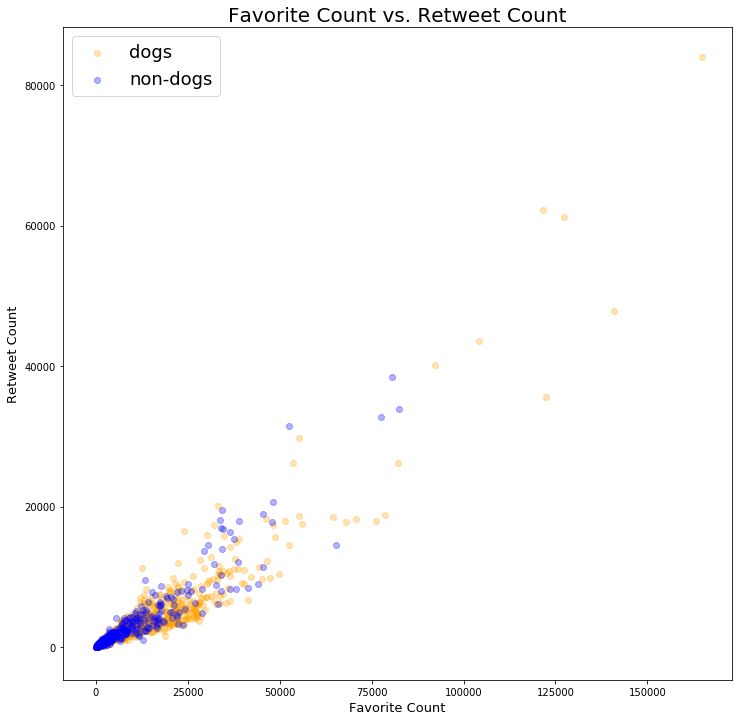

In [430]:
plt.figure(figsize=(12,12))

plt.scatter(df_master.loc[index_dog,:].favorite_count, df_master.loc[index_dog,:].retweet_count, c='orange',alpha=.3,label='dogs')
plt.scatter(df_master.loc[index_not_dog,:].favorite_count, df_master.loc[index_not_dog,:].retweet_count, c='blue',alpha=.3, label='non-dogs')
plt.legend(prop={'size':18})
plt.xlabel('Favorite Count', fontsize=13)
plt.ylabel('Retweet Count', fontsize=13)
plt.title('Favorite Count vs. Retweet Count', fontsize=20);

The graph above shows that those tweets predicted to be dogs have far more outliers that those tweets predicted to be of nondogs.

**3. QUESTION: What are the most popular dog names tweeted?**

In [448]:
df_master.name.value_counts().head(15)

Charlie    11
Lucy       11
Oliver     10
Cooper     10
Tucker      9
Penny       9
Lola        8
Sadie       8
Winston     8
Toby        7
Daisy       7
Jax         6
Bella       6
Bo          6
Oscar       6
Name: name, dtype: int64

The most popular male dog name is **Charlie** and the most popular female dog name is **Lucy**.

Below shows a list of dog names in order of popularity.

In [437]:
df_master.name.value_counts().index.values

array(['Charlie', 'Lucy', 'Oliver', 'Cooper', 'Tucker', 'Penny', 'Lola',
       'Sadie', 'Winston', 'Toby', 'Daisy', 'Jax', 'Bella', 'Bo', 'Oscar',
       'Stanley', 'Koda', 'Bailey', 'Leo', 'Buddy', 'Rusty', 'Bentley',
       'Louis', 'Scout', 'Chester', 'Milo', 'Dave', 'Brody', 'Gus',
       'George', 'Scooter', 'Boomer', 'Duke', 'Reggie', 'Dexter', 'Larry',
       'Chip', 'Alfie', 'Jack', 'Clark', 'Jeffrey', 'Derek', 'Gary',
       'Clarence', 'Finn', 'Sophie', 'Jerry', 'Maggie', 'Sammy', 'Winnie',
       'Oakley', 'Cassie', 'Archie', 'Bear', 'Phil', 'Wallace', 'Malcolm',
       'Ellie', 'Gizmo', 'Zeke', 'Doug', 'Lily', 'Nala', 'Calvin',
       'Louie', 'Luna', 'Jimothy', 'Wyatt', 'Walter', 'Mia', 'Maximus',
       'Earl', 'Ted', 'Ruby', 'Otis', 'Moose', 'Olive', 'Reese', 'Steven',
       'Vincent', 'Gerald', 'Riley', 'Shadow', 'Loki', 'Reginald',
       'Rosie', 'Kyle', 'Beau', 'Zoey', 'Max', 'Samson', 'Sunny',
       'Waffles', 'Klevin', 'Carl', 'Bruce', 'Sebastian', 'Wilson',
   

**As a follow up question, let see how the average favorite/retweet count differ from dogs with unique names (defined as count equals 1) to dogs with common names (defined as count of 2 or more in our dataset).**

In [456]:
#store unique names
unique_names=df_master.name.value_counts()[(df_master.name.value_counts()==1)].index

In [461]:
#unique names stats
df_master[df_master.name.apply(lambda name: name in unique_names)][['favorite_count','retweet_count']].describe()

,favorite_count,retweet_count
count,700.000000,700.000000
mean,8551.435714,2466.245714
std,12175.256021,4128.645311
min,189.000000,44.000000
25%,2003.000000,581.750000
50%,3977.500000,1301.000000
75%,10975.000000,2929.500000
max,127430.000000,61184.000000


In [462]:
#common names stats
df_master[df_master.name.apply(lambda name: name not in unique_names)][['favorite_count','retweet_count']].describe()

,favorite_count,retweet_count
count,1420.000000,1420.000000
mean,8344.277465,2664.919718
std,12558.336427,4892.943789
min,51.000000,0.000000
25%,1724.500000,550.750000
50%,3734.000000,1229.000000
75%,10099.500000,2972.500000
max,164757.000000,83949.000000


The average count for favorited tweet under unique names is 8551.44 and the average count for retweets is 2466.25.

The average count for favorited tweet under common names is 8344.27 and the average count for retweets is 2664.91.

The average count for favorite tweet is slightly higher for unique names but slightly lower for retweets.